In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetic-retinopathy-2015-data-colored-resized/trainLabels.csv
/kaggle/input/diabetic-retinopathy-2015-data-colored-resized/colored_images/colored_images/Mild/43154_right.png
/kaggle/input/diabetic-retinopathy-2015-data-colored-resized/colored_images/colored_images/Mild/19986_left.png
/kaggle/input/diabetic-retinopathy-2015-data-colored-resized/colored_images/colored_images/Mild/41318_left.png
/kaggle/input/diabetic-retinopathy-2015-data-colored-resized/colored_images/colored_images/Mild/38326_left.png
/kaggle/input/diabetic-retinopathy-2015-data-colored-resized/colored_images/colored_images/Mild/27959_left.png
/kaggle/input/diabetic-retinopathy-2015-data-colored-resized/colored_images/colored_images/Mild/24696_right.png
/kaggle/input/diabetic-retinopathy-2015-data-colored-resized/colored_images/colored_images/Mild/16963_right.png
/kaggle/input/diabetic-retinopathy-2015-data-colored-resized/colored_images/colored_images/Mild/43540_right.png
/kaggle/input/diabetic-retinopa

In [2]:
!pip install -U tensorflow-addons

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Orignal: <class 'PIL.PngImagePlugin.PngImageFile'>
NumPy array info:
<class 'numpy.ndarray'>
type: float32
shape: (224, 224, 3)
converting NumPy array: <class 'PIL.Image.Image'>


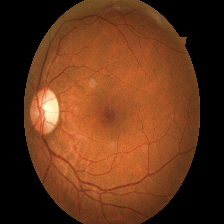

In [4]:
# example of converting an image with the Keras API
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array,array_to_img

# load the image
img = load_img('/kaggle/input/diabetic-retinopathy-2015-data-colored-resized/colored_images/colored_images/Mild/10030_left.png')
print("Orignal:" ,type(img))

# convert to numpy array
img_array = img_to_array(img)
print("NumPy array info:") 
print(type(img_array))    

print("type:",img_array.dtype)
print("shape:",img_array.shape)
# convert back to image

img_pil = array_to_img(img_array)
print("converting NumPy array:",type(img_pil))
img_pil

In [5]:
import glob
mild = glob.glob('/kaggle/input/diabetic-retinopathy-2015-data-colored-resized/colored_images/colored_images/Mild/*.*')
moderate = glob.glob('/kaggle/input/diabetic-retinopathy-2015-data-colored-resized/colored_images/colored_images/Moderate/*.*')
normal = glob.glob('/kaggle/input/diabetic-retinopathy-2015-data-colored-resized/colored_images/colored_images/No_DR/*.*')
proliferate = glob.glob('/kaggle/input/diabetic-retinopathy-2015-data-colored-resized/colored_images/colored_images/Proliferate_DR/*.*')
severe = glob.glob('/kaggle/input/diabetic-retinopathy-2015-data-colored-resized/colored_images/colored_images/Severe/*.*')


data = []
labels = []

for i in mild:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in moderate:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(1)
for i in proliferate:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(2)
for i in severe:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(3)
for i in normal:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(4)
    
data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2,random_state=42)

In [6]:
print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (28100, 224, 224, 3) - y_train shape: (28100,)
x_test shape: (7026, 224, 224, 3) - y_test shape: (7026,)


In [7]:
num_classes = 5
input_shape = (224, 224, 3)
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 100
image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier


In [8]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [9]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [10]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 72 X 72
Patch size: 6 X 6
Patches per image: 144
Elements per patch: 108


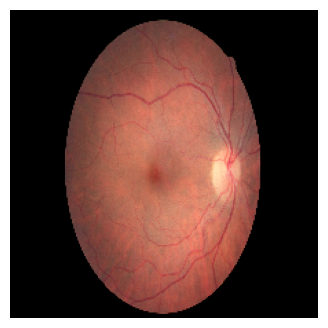

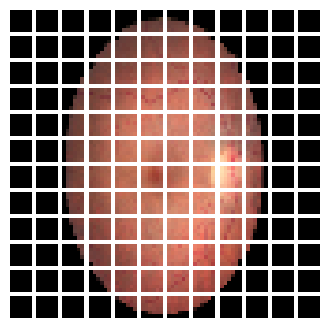

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [12]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [13]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [14]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Epoch 1/100
99/99 [==============================] - 52s 388ms/step - loss: 1.4946 - accuracy: 0.7015 - top-5-accuracy: 1.0000 - val_loss: 0.8971 - val_accuracy: 0.7263 - val_top-5-accuracy: 1.0000
Epoch 2/100
99/99 [==============================] - 37s 370ms/step - loss: 0.9054 - accuracy: 0.7366 - top-5-accuracy: 1.0000 - val_loss: 0.8908 - val_accuracy: 0.7263 - val_top-5-accuracy: 1.0000
Epoch 3/100
99/99 [==============================] - 38s 381ms/step - loss: 0.8920 - accuracy: 0.7367 - top-5-accuracy: 1.0000 - val_loss: 0.8945 - val_accuracy: 0.7263 - val_top-5-accuracy: 1.0000
Epoch 4/100
99/99 [==============================] - 38s 383ms/step - loss: 0.8868 - accuracy: 0.7367 - top-5-accuracy: 1.0000 - val_loss: 0.8968 - val_accuracy: 0.7263 - val_top-5-accuracy: 1.0000
Epoch 5/100
99/99 [==============================] - 38s 380ms/step - loss: 0.8840 - accuracy: 0.7368 - top-5-accuracy: 1.0000 - val_loss: 0.8946 - val_accuracy: 0.7263 - val_top-5-accuracy: 1.0000
Epoch 6/10